## 1. Business objective

The project aims to develop an AI-driven predictive model, 'COVID-19 Prognosis AI: Enhancing Diagnosis, Reducing Burden,' to significantly improve the accuracy of COVID-19 diagnosis by leveraging patient symptoms, age, and contact history. This initiative seeks to enhance medical diagnosis, streamline resource allocation in healthcare, reduce the burden on healthcare systems, provide a scalable framework for future infectious diseases, and contribute valuable insights to ongoing research efforts in the field, ultimately improving public health outcomes and preparedness.

## 2. Data Preparation/Data preprocessing: Feature  Engineering + Feature selection

In [20]:
# Importing all required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [21]:
# Importing the collected dataset
corona_db = pd.read_csv('corona_tested.csv')

C:\Users\91630\AppData\Local\Temp\ipykernel_7864\507917939.py:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  corona_db = pd.read_csv('corona_tested.csv')


In [22]:
# Quick glance
corona_db.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


## 2.2 Exploratory data analysis

In [23]:
corona_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [24]:
corona_db.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [25]:
corona_db.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [26]:
corona_db.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2.2 Checking whether there is any wrong entries:

In [27]:
corona_db["Cough_symptoms"].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [28]:
corona_db["Fever"].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [29]:
corona_db["Sore_throat"].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [30]:
corona_db["Headache"].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [31]:
corona_db["Corona"].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [32]:
corona_db["Age_60_above"].unique()

array(['None', 'No', 'Yes'], dtype=object)

In [33]:
corona_db["Sex"].unique()

array(['None', 'male', 'female'], dtype=object)

In [34]:
corona_db["Known_contact"].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

## 2.2.3 Standardizing the entries (Data cleaning)

* As we can see there are some columns with various representations of boolean values, including strings ('TRUE' and 'FALSE') as well as Python's boolean values (True and False).
* The presence of multiple representations of the same information (e.g., 'TRUE', 'FALSE', True, False) can affect the nominal encoding of categorical data in a machine learning context. To effectively encode such data, you should ensure that the values are consistent and properly converted to a single data type.

In [35]:
# Standardizing the entries in the column Cough_symptoms
corona_db['Cough_symptoms'] = corona_db['Cough_symptoms'].replace({'TRUE': True, 'FALSE': False})

In [36]:
corona_db["Cough_symptoms"].unique()

array([True, False, 'None'], dtype=object)

In [37]:
# Standardizing the entries in the column Fever
corona_db['Fever'] = corona_db['Fever'].replace({'TRUE': True, 'FALSE': False})

In [38]:
corona_db['Fever'].unique()

array([False, True, 'None'], dtype=object)

In [39]:
# Standardizing the entries in the column Sore_throat
corona_db['Sore_throat'] = corona_db['Sore_throat'].replace({'TRUE': True, 'FALSE': False})

In [40]:
corona_db['Sore_throat'].unique()

array([True, False, 'None'], dtype=object)

In [41]:
# Standardizing the entries in the column Sore_throat
corona_db['Headache'] = corona_db['Headache'].replace({'TRUE': True, 'FALSE': False})

In [42]:
corona_db['Headache'].unique()

array([False, True, 'None'], dtype=object)

## 2.2.4 Checking for null values

In [43]:
corona_db.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

## 2.2.5 Checking for duplicates

In [44]:
corona_db.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
278843    False
278844    False
278845    False
278846    False
278847    False
Length: 278848, dtype: bool

In [45]:
corona_db.duplicated().sum()

0

## 2.2.6 Renaming the columns properly (Data cleaning)

In [46]:
# Renaming columns properly:

corona_db.rename(columns = {
    'Ind_ID':'Id',
    'Cough_symptoms':'Cough',
    'Corona':'Test_results'
}, inplace = True)

In [47]:
corona_db.head()

,Id,Test_date,Cough,Fever,Sore_throat,Shortness_of_breath,Headache,Test_results,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,FALSE,False,negative,None,None,Abroad
1,2,11-03-2020,False,True,False,FALSE,False,positive,None,None,Abroad
2,3,11-03-2020,False,True,False,FALSE,False,positive,None,None,Abroad
3,4,11-03-2020,True,False,False,FALSE,False,negative,None,None,Abroad
4,5,11-03-2020,True,False,False,FALSE,False,negative,None,None,Contact with confirmed


## 2.2.7 Rearranging the columns (Data cleaning)

In [48]:
columns=["Id", "Test_date", "Cough", "Fever", "Sore_throat", "Shortness_of_breath", "Headache",
         "Age_60_above", "Sex", "Known_contact", "Test_results"]
corona_df = corona_db[columns]

In [49]:
corona_df.head()

,Id,Test_date,Cough,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Test_results
0,1,11-03-2020,True,False,True,FALSE,False,None,None,Abroad,negative
1,2,11-03-2020,False,True,False,FALSE,False,None,None,Abroad,positive
2,3,11-03-2020,False,True,False,FALSE,False,None,None,Abroad,positive
3,4,11-03-2020,True,False,False,FALSE,False,None,None,Abroad,negative
4,5,11-03-2020,True,False,False,FALSE,False,None,None,Contact with confirmed,negative


In [70]:
# Saving the cleaned data as a csv file to be used in sql queries
corona_df.to_csv('corona.csv', index=False)

## 2.2.8 Data exploration using plots

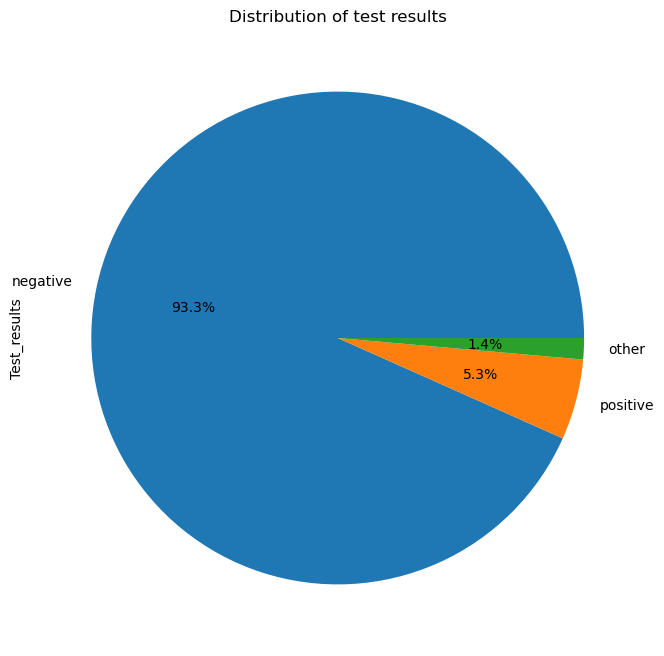

In [174]:
# Pie Chart-Sex
plt.figure(figsize=(8, 8))
corona_df['Test_results'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of test results')
plt.show()

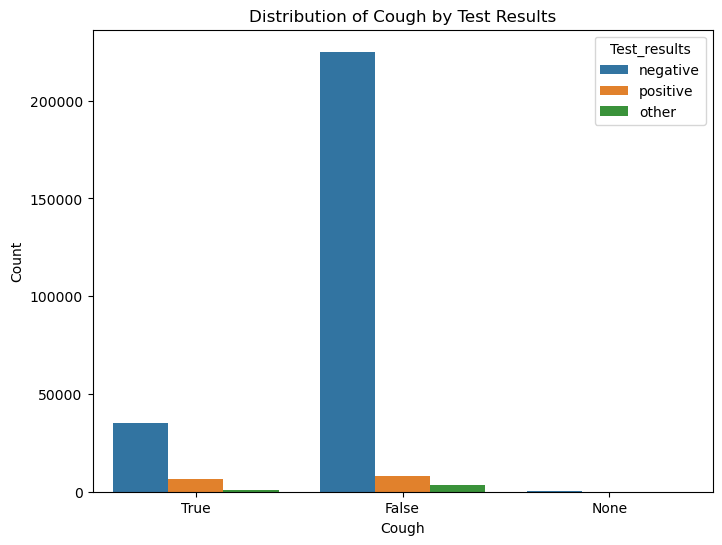

In [50]:
# Count plot-Distribution of Cough by Test Results
plt.figure(figsize=(8, 6))
sns.countplot(data=corona_df, x='Cough', hue='Test_results')
plt.title('Distribution of Cough by Test Results')
plt.xlabel('Cough')
plt.ylabel('Count')
plt.show()

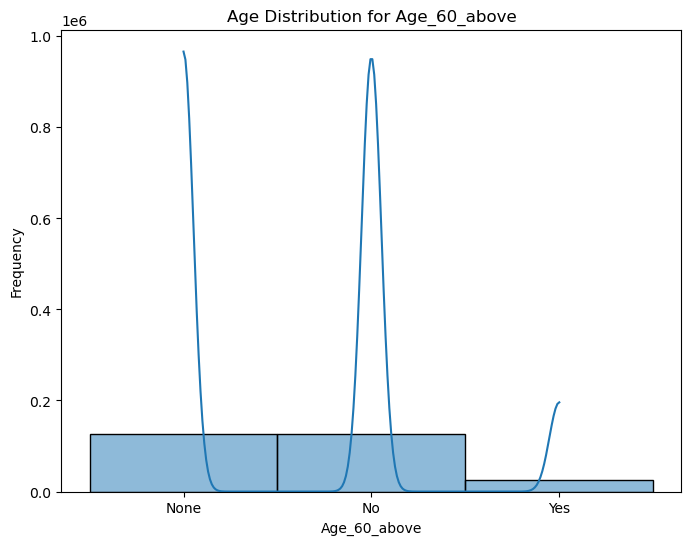

In [51]:
# Hist plot-Age Distribution for Age_60_above
plt.figure(figsize=(8, 6))
sns.histplot(data=corona_df, x='Age_60_above', bins=10, kde=True)
plt.title('Age Distribution for Age_60_above')
plt.xlabel('Age_60_above')
plt.ylabel('Frequency')
plt.show()

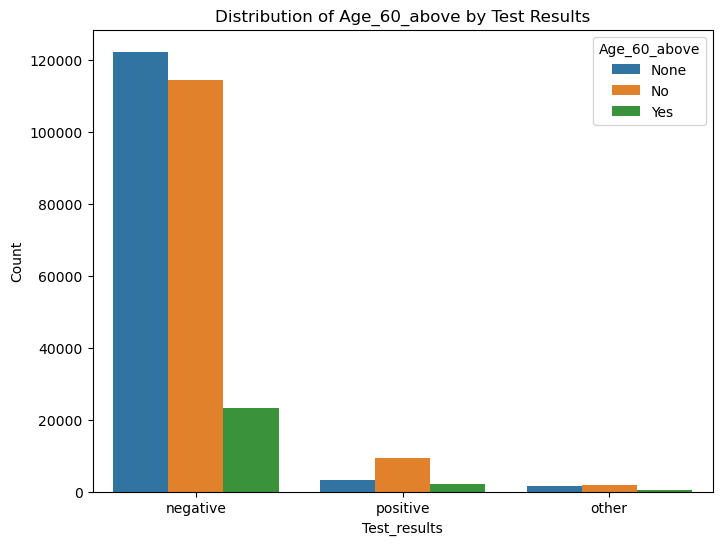

In [57]:
# Count Plot-Age_60_above by Test_results
plt.figure(figsize=(8, 6))
sns.countplot(data=corona_df, x='Test_results', hue='Age_60_above')
plt.title('Distribution of Age_60_above by Test Results')
plt.xlabel('Test_results')
plt.ylabel('Count')
plt.show()

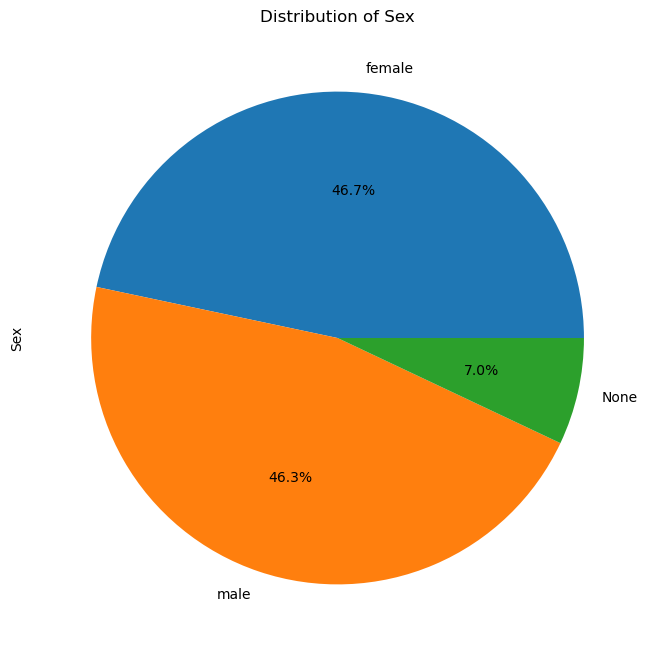

In [58]:
# Pie Chart-Sex
plt.figure(figsize=(8, 8))
corona_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Sex')
plt.show()

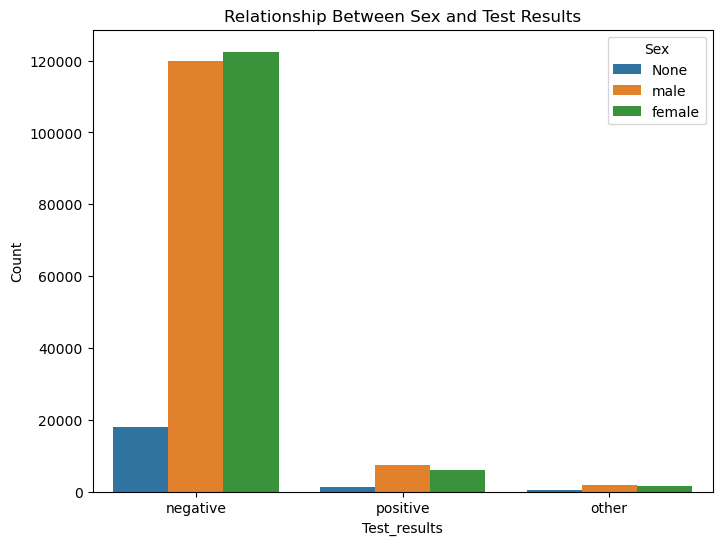

In [63]:
# Stacked Bar Chart-Sex and Test_results
plt.figure(figsize=(8, 6))
sns.countplot(data=corona_df, x='Test_results', hue='Sex')
plt.title('Relationship Between Sex and Test Results')
plt.xlabel('Test_results')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()

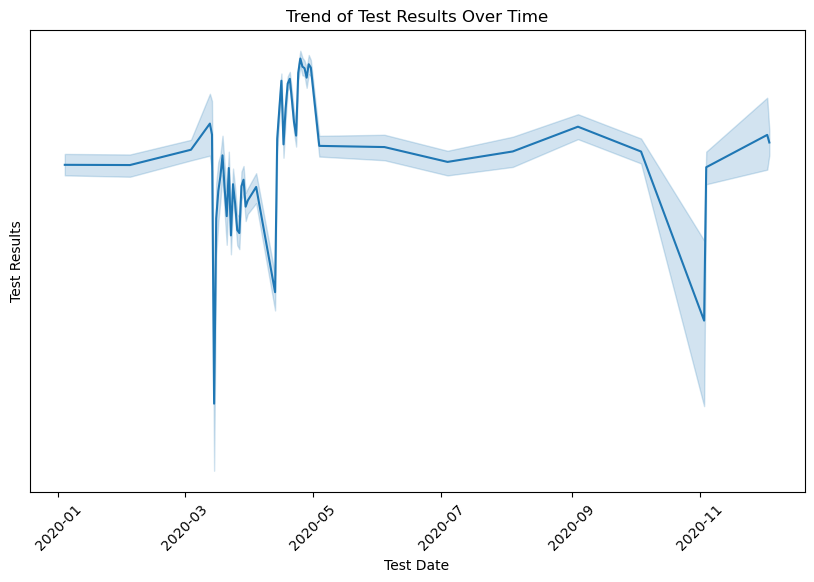

In [71]:
# Line Chart-Test_date against Test_results
plt.figure(figsize=(10, 6))
sns.lineplot(data=corona_df, x='Test_date', y='Test_results')
plt.title('Trend of Test Results Over Time')
plt.xlabel('Test Date')
plt.ylabel('Test Results')
plt.xticks(rotation=45)
plt.show()

## 2.2.9 Dropping unwanted rows (Data cleaning)

In [52]:
x = corona_df['Test_results'] != 'other'

corona_df = corona_df[x]

In [53]:
corona_df['Test_results'].value_counts()

negative    260227
positive     14729
Name: Test_results, dtype: int64

In [54]:
corona_df['Test_results'] = corona_df['Test_results'].replace({'negative': 0, 'positive': 1})

## 3. Data transformation or Data Wrangling

## 3.1 Encoding
* Converting the categorical data to numerical data.
* This is to make the data to be easily understand by the machine.

In [202]:
corona_df.head()

,Id,Test_date,Cough,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Test_results
0,1,11-03-2020,True,False,True,FALSE,False,None,None,Abroad,0
1,2,11-03-2020,False,True,False,FALSE,False,None,None,Abroad,1
2,3,11-03-2020,False,True,False,FALSE,False,None,None,Abroad,1
3,4,11-03-2020,True,False,False,FALSE,False,None,None,Abroad,0
4,5,11-03-2020,True,False,False,FALSE,False,None,None,Contact with confirmed,0


In [55]:
# Dummy encoding

covid_df = pd.get_dummies(corona_df, columns=['Cough', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache',
                                          'Age_60_above', 'Sex', 'Known_contact'], drop_first=True)

In [56]:
covid_df=covid_df.drop('Test_date', axis=1)

In [57]:
covid_df=covid_df.drop('Id', axis=1)

## 3.2 Spliting the data into Train Test Split

In [58]:
# Seperating Independent and dependent variables
x = covid_df.iloc[:,:-1]
y = covid_df.iloc[:,-1]

In [59]:
x.head()

,Test_results,Cough_True,Cough_None,Fever_True,Fever_None,Sore_throat_True,Sore_throat_None,Shortness_of_breath_True,Shortness_of_breath_FALSE,Shortness_of_breath_None,Shortness_of_breath_TRUE,Headache_True,Headache_None,Age_60_above_None,Age_60_above_Yes,Sex_female,Sex_male,Known_contact_Contact with confirmed
0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [60]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Known_contact_Other, dtype: uint8

In [61]:
# Train Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 16)

## 3.3 Standardization / Feature scaling

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 4. Machine learning approach

## 4.1 Logistic regression

In [215]:
# Modeling
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state = 0, max_iter=1000)
logistic_reg.fit(x_train, y_train)

# Predictions
ypred_train = logistic_reg.predict(x_train)
ypred_test  = logistic_reg.predict(x_test)


# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

# Calculation of cross validation score:
from sklearn.model_selection import cross_val_score
print("Cross validation score: ", cross_val_score(logistic_reg, x,y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9160804751146711
Test Accuracy:  0.9158907962370284
Cross validation score:  0.9082434280369215


## 4.2 KNN

In [216]:
# K-Nearest Neighbors with default parameters

# Modeling
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

# Prediction
ypred_train = model.predict(x_train)
ypred_test  = model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("Cross validation score: ", cross_val_score(model,x,y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9149423221742999
Test Accuracy:  0.9134419551934827
Cross validation score:  0.9078979076280935


In [217]:
# Hyper Parameter Tuning to improve the model's performance with best combination of hyperparameters

from sklearn.model_selection import GridSearchCV

estimator = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1,11))}

cv_classifier = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')

cv_classifier.fit(x_train, y_train)

cv_classifier.best_params_

{'n_neighbors': 9}

In [218]:
# KNN with the best combinations
# Applying the k value obtained from Hyper parameter tuning to the KNN to get the best accuracy & CVS

# Modeling
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 9)     # Changed the default K value to the value obtained from HPT
model.fit(x_train, y_train)

# Prediction
ypred = model.predict(x_test)
ypred_train = model.predict(x_train)
ypred_test  = model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("Cross validation score: ", cross_val_score(model,x,y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9178176559183953
Test Accuracy:  0.9159150421879546
Cross validation score:  0.9073632755479277


## 4.3 SVM

In [219]:
# Modeling
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Prediction
ypred_train = svm_model.predict(x_train)
ypred_test  = svm_model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("cross validation score: ", cross_val_score(model, x, y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9220279660436776
Test Accuracy:  0.9206430026185627
cross validation score:  0.9073632755479277


## 4.4 Decision tree

In [220]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [221]:
# Modeling
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=16)
dt_model.fit(x_train, y_train)

# Prediction
ypred_train = dt_model.predict(x_train)
ypred_test  = dt_model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("cross validation score: ", cross_val_score(model, x, y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9223274799753542
Test Accuracy:  0.9202793133546697
cross validation score:  0.9073632755479277


## 4.5 Random forest

In [222]:
# Random forest with default parameters

# Modeling
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=16)
model.fit(x_train, y_train)

# Prediction
ypred_train = model.predict(x_train)
ypred_test  = model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("cross validation score: ", cross_val_score(model, x, y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9223274799753542
Test Accuracy:  0.9204005431093008
cross validation score:  0.9089199019722681


In [224]:
# Measuring the importance of each feature in this model
model.feature_importances_

array([7.75637861e-02, 4.48771550e-01, 6.37197422e-05, 1.04966066e-01,
       5.67602277e-05, 7.66291430e-03, 3.41449641e-07, 1.20679377e-03,
       1.09050986e-02, 9.39656730e-07, 3.92016700e-03, 9.96012422e-03,
       1.46618080e-06, 6.30776205e-03, 4.03184438e-03, 2.64083960e-03,
       3.05158359e-03, 3.18888243e-01])

## 4.6 XG Boost

In [225]:
# Modeling
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

# Prediction
ypred_train = xgb_model.predict(x_train)
ypred_test  = xgb_model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("cross validation score: ", cross_val_score(model, x, y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9221477716163483
Test Accuracy:  0.9204975269130056
cross validation score:  0.9089199019722681


## Model Selection

Selecting the best model on the basic of:
    
(a) Condition1: Test accuracy = Train accuracy = Cross validation score (+/- 5 is accaptable)
    
(b) Condition2: If the more than one model is satisfing the 1st condition go for the model having the highest CV

* While examing all the models Random forest and XGBoost appears to be almost equal giving high train accuracy, test accuracy and cross validation score.
* But Random forest gives little more train accuracy.
* So i opt for Random forest as the best model.

In [64]:
# Random forest (Selected model)

# Modeling
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=16)
model.fit(x_train, y_train)

# Prediction
ypred_train = model.predict(x_train)
ypred_test  = model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print("cross validation score: ", cross_val_score(model, x, y, cv=5, scoring="accuracy").mean())

Train Accuracy:  0.9223274799753542
Test Accuracy:  0.9204005431093008
cross validation score:  0.9089199019722681


## Checking for confusion metrix and Classification report for the final model

In [65]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, ypred_test))

[[ 3602  1771]
 [ 1512 34359]]


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69      5373
           1       0.95      0.96      0.95     35871

    accuracy                           0.92     41244
   macro avg       0.83      0.81      0.82     41244
weighted avg       0.92      0.92      0.92     41244

